# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель проекта**:
- Подробно изучить параметры объектов недвижимости.
- Получить информацию о времени продажи квартиры.
- Изучить и найти факторы, которые большего всего влияют на стоимость квартиры.
- Определить 10 населенных пунктов по стоимости 1-го квадратного метра.
- Вычислить среднюю стоимость квадратного метра в г.Санкт-Петербург по мере удаления от центра.

**Ход исследования**

Данные об объектах недвижимости представлены в файле  `/datasets/real_estate_data.csv`. О данных в файле информация не представлена, поэтому необходимо провести обзор данных. Нужно проверить данных на ошибки о оценить их влияние на исследование, и их исправить. После обработки данных приступить к выпролнению рассчетов, добавлению новых столбцов таблицы, построению графиков и пр.

Таким образом, исследование пройдёт в 5 этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Провести расчеты и добавить новые столбцы в таблицу.
 4. Исследовательский анализ данных
 5. Выводы

### Откройте файл с данными и изучите общую информацию

#### **Импортируем необходимые бибилиотеки  и откроем файл с датафреймом и сохраним в переменныю data.**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('real_estate_data.csv')

#### Прсомотрим данные первых 20 строк датафрейма с помощью метода `head()` 

In [8]:
data.head(20)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Обнаружилась ошибка - данные записаны в одну строчку, а не разбиты по колонкам. Для исправлении данный ошибки необходимо в аргументе `sep` метода `pd.read_csv()` указать `\t` для разбития данных по колонкам.

In [10]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

Теперь проверим таблицу. Для этого вызовим метод `head()` снова. 

In [12]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Выведим основную информацию о датафрейме с помощь метода `info()`.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [15]:
#### Получим представление о данных в числах с помощью метода `describe()`

In [16]:
#Устанавливаем формат отображения чисел с плавающей запятой (float) в два знака.
#Это позволяет отобразить числа с ограниченным числом десятичных знаков для более удобного чтения
pd.options.display.float_format = '{:.2f}'.format
data.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


#### Построим гистограммы для числовых значений датафрейма

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

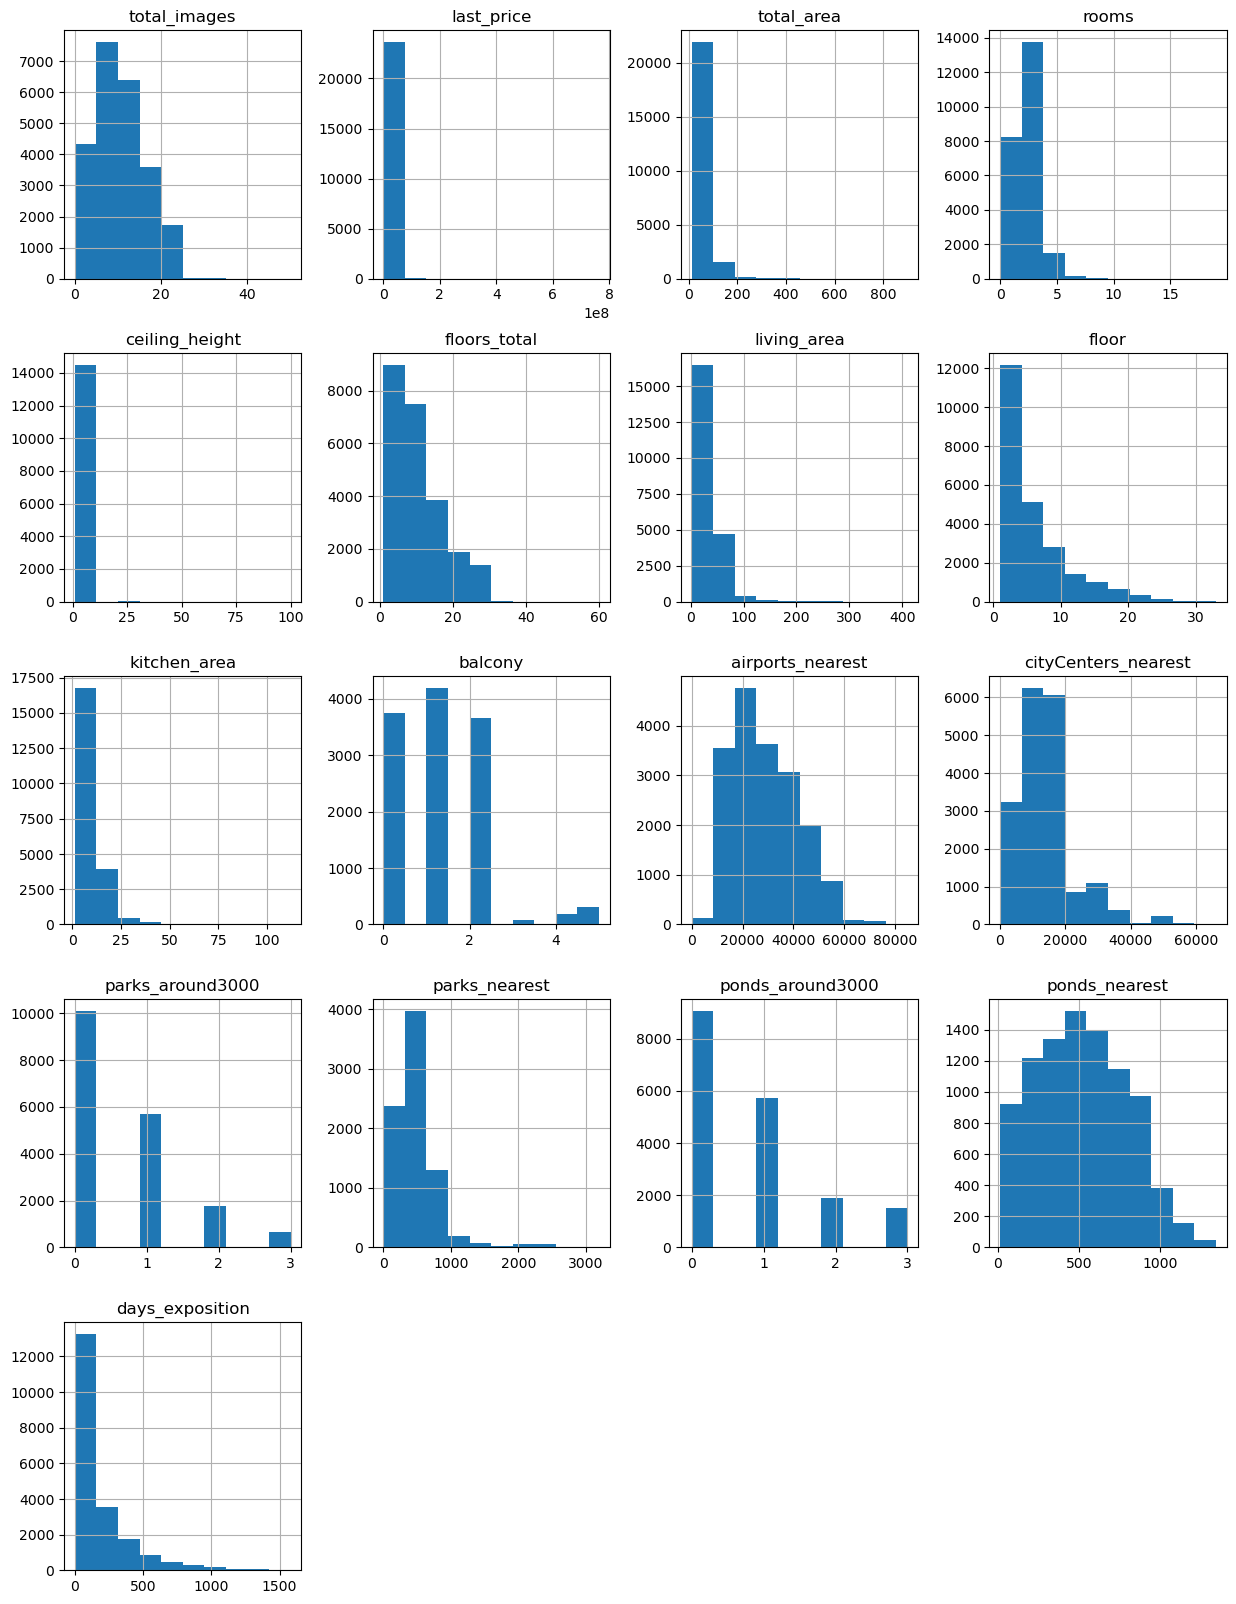

In [18]:
data.hist(figsize=(15, 20))

 - Некоторые столбцы содержат некорректный тип данных:
    - first_day_exposition является object, а должен быть datatime;
    - is_apartment строка object, по вводным данным bool.
 - Значения некоторых столбцов имеют нереалестичные значения:
    - last_price имеет слишком низкое значение минимальной стоимости = 12190;
    - celling_height имеет аномально низкое и высокое значение (1 и 100);
    - living_area имеет слишком низкую минимальную площаль;
    - kitchen_area минимальная площадь неправдоподобно низкая - 1.30.
 - Некоторые значения столбцов имеют множество значения равные 0 судя по графикам (напримерб days_exposition, balcony, floors_total и пр.) Скорее всего, эти поля не обязательны для заполнения, поэтому им могут присваивать значения по умолчанию равное 0, или пользователи сами ставили эти значениея.
 - Столбцы cityCenters_nearest, ponds_around3000 и parks_around3000 имеют неверный стиль заголовков.
 - Присутствуют пропущенные значения.

### Выполните предобработку данных

#### Приведем имена столбцов к единому стилю.

In [22]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000':
                           'pounds_around_3000'})
# проверим результат
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'pounds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Обработаем пропуски

Узнаем число пропусков в каждом столбце

In [25]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
pounds_around_3000       5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах из 22 присутствуют пропуски:

- ceiling_height: 9195 пропусков. Множество объявлений не имеют информацию о высоте потолков. Данные по этому столбцу для  исследования маловажны. Пропуски заменим.
- floors_total: 86 пропусков. Пропусков мало, на исследование не повлияют. Пропуски оставляем.
- living_area: 1903 пропуска. Число пропусков менее 10%, но данные по этому столбцу нужны для исследования. Их можно заполнить медианой.
- is_apartment: 20924 пропусков. Тип данных этого столюца является булев. Значения можно заменить на False
- kitchen_area: 2278 пропусков. Количество пропусков менее 10%, но эти данные важны для исследования. Заполнить значения можно медианой.
- balcony: 11519 пропусков. Вероятно, пользователи при отсутствии балконов их не указывают. В заменим пропуски нулями.
- locality_name: 49 пропусков. Количество пропусков мало, на исследование не повлияют, оставим пропуски.
- airports_nearest: 5542 пропусков. Пропуски возникли из-за незнания пользователями данной информации и сложности вычисления. Данные этого столбца маловажны, поэтому пропуски оставим.
- city_centers_nearest: 5519 пропусков. Пропускиб скорее всего, возникли в связи с отсутствием информации у пользователей. Значения данного столбца важны, поэтому пропуски заполним.
- parks_around_3000: 5518 пропусков. Число пропусков совпадает с числом пропусков в ponds_around_3000. Пропуски в столбце на задачи исследования не влияют, оставим их.
- parks_nearest: 15620 пропусков. Более половины объектов не имеют информации о ближайшем парке. Пропуски в столбце на задачи исследования не влияют, оставим их.
- ponds_around_3000: 5518 пропусков. Число совпадает с числом пропусков parks_around_3000, что выглядит подозрительно. Пропуски в столбце на исследование не влияют, оставим их.
- ponds_nearest: 14589 пропусков. Больше половины объектов не имеют информации о ближайшем парке. Пропуски в столбце на задачи исследования не влияют, оставим их.
- days_exposition: 3181 пропусков. 13% объявлений не содержат информации о количестве дней размещения объявления, что, довольно таки странно, так как эти цифры были получены автоматическим сбором данных. Возможно, это техническая ошибка, которая произошла в момент сбора или выгрузки данных. Данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.

#### Заполним пропуски в столбцах is_apartment на False и balcony на 0

In [28]:
data['is_apartment'].fillna(False, inplace=True)
#проверим результат
data['is_apartment'].isna().sum()

0

In [29]:
data['balcony'].fillna(0, inplace=True)
#проверим результат
data['balcony'].isna().sum()

0

#### Заполним пропуски в столбце ceiling_height.


Высоту потолков в многоквартирных домах стандартной застройки регламентирует п. 5.8 СНиП 31-01-2003. Согласно этому документу, высота потолка зависит от климатических условий в конкретном районе, а также от назначения и типа комнаты. В теплых зонах потолок должен располагаться на высоте не менее 2,7 метра, а для остальных районов минимальная высота потолка составляет 2,5 метра. Из этого следует, что на высоты потолка влияет расположение города. Поэтому заполним пропуски медианным значением, основываясь на расположении города.

In [32]:
data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
#проверим результат
data['ceiling_height'].isna().sum()

0

#### Заполним пропуски в столбце living_area и kitchen_area.

In [34]:
# Рассчитаем коэффициент отношения жилой площади к общей площади и возьмем среднее значение
living_area_coef = (data['living_area'] / data['total_area']).mean()
# Заполняем пропуски в столбце 'living_area'
data['living_area'].fillna(living_area_coef * data['total_area'], inplace=True)
data['living_area'].isna().sum()

0

In [35]:
# Рассчитаем коэффициент отношения площади кухни к общей площади и возьмем среднее значение
kitchen_area_coef = (data['kitchen_area'] / data['total_area']).mean()
# Заполняем пропуски в столбце 'kitchen_area'
data['kitchen_area'].fillna(kitchen_area_coef * data['total_area'], inplace=True)
data['kitchen_area'].isna().sum()

0

#### Удалим строчки, где пропущены названия населенных пунктов.

In [37]:
# Удалим строчки, где пропущены названия населенных пунктов, чтобы они не мешали при анализе
data = data.dropna(subset=['locality_name'])
# проверим, что пропуски удалены
data['locality_name'].isna().sum()

0

#### Преобразует типы данных


Меняем тип в следующих столбцах: first_day_exposition(datetime), is_apartment(boolean).

In [40]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [41]:
data['is_apartment'] = data['is_apartment'].astype('bool')
# Проверим изменения
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
pounds_around_3000             float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

#### Обработка дубликатов

Проверим наличие явных дубликатов.

In [44]:
data.duplicated().sum()

0

Явных дубликатов нет

Проверим наличие неявных дубликатов. Они могут быть только в столбце locality_name, так как только он имеет тип данных odject.

In [47]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В названиях присутствуют дубликаты:
- встречается написание 'поселок' и 'посёлок'. Нужно заменить букву ё на е;
- есть повторяющиеся названия населенных пунктов, но с разным видом: 'Никольское' - 'село Никольское', 'городской посёлок Советский' - 'посёлок городского типа Советский' и пр.

In [49]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [50]:
# Замени дубликаты населенных пунктов
data = data.replace({'locality_name':{'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 
                                      'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 
                                      'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга':
                                      'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия':
                                      'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 
                                      'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})
# Проверим изменения
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Слан

Дубликаты заменены

#### Обработаем аномальные значения


Столбец celling_height имеет аномально низкое и высокое значение (1 и 100). Также можно заметить, что встречаются потолки с высотой 20 - 35 метров, что на самом деле может быть значениями 2.5-3.5 м. Такие значения нужно поделить на 10.

In [54]:
# Для значений больше 20 применим деление на 10
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10

<Axes: >

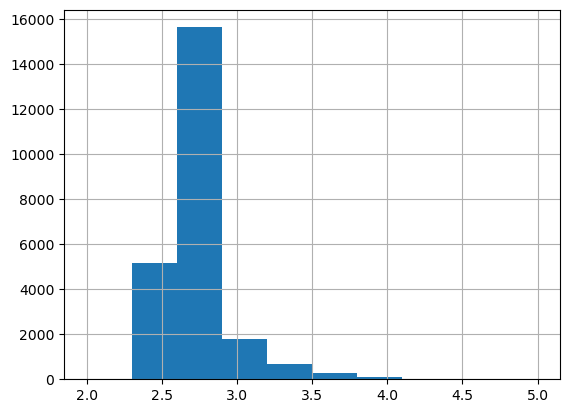

In [55]:
# Построим гитограмму по значениям высоты потолков
data['ceiling_height'].hist(bins=10, range=(2, 5))

Большая часть занчений лежет в промежутке 2.6 - 2.8

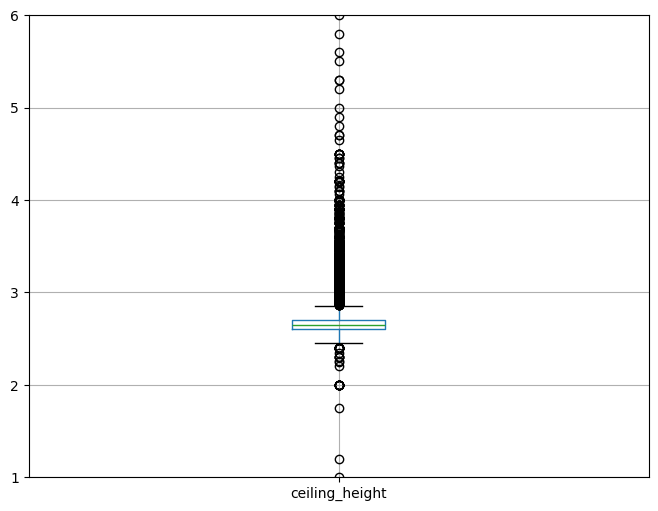

In [57]:
# Построим диаграмму размаха высоты потолков
data.boxplot(column='ceiling_height', figsize=(8, 6))
plt.ylim(1, 6)
plt.show()

Из графика видно, значения менее 2.5м и более 2.8 метров - выбросы.

In [59]:
# Оставим строки с высотой потолков от 2.5 до 5 метров
data = data.query('2.5 <= ceiling_height <= 5')

Посчитаем число аномальных значений в столбцах living_area и kitchen_area. Согласно СНиП, минимальный размер кухни равен 5 кв.м, а жилой зоны - 8 кв.м.

<Axes: >

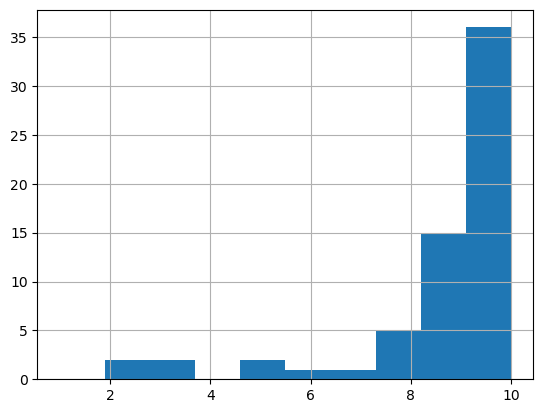

In [61]:
data['living_area'].hist(bins=10, range=(1, 10))

Значений в данном диапазоне очень мало, они не будут влият на результат. Оставим их.

<Axes: >

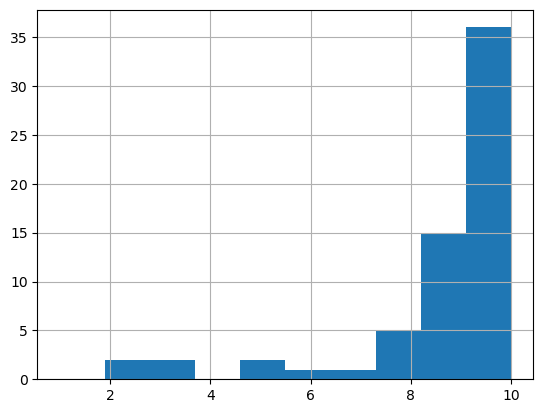

In [63]:
data['living_area'].hist(bins=10, range=(1, 10))

Значений в данном диапазоне тоже очень мало, они не будут влият на результат. Оставим их.

Проверим, встречаются ли сточки, в которых сумма площади кухни и жилой зоны больше общей.

In [66]:
data[data['total_area'] < (data['kitchen_area'] + data['living_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pounds_around_3000,ponds_nearest,days_exposition
184,7,2600000.00,30.20,2018-02-14,1,2.65,9.00,26.10,5,False,...,6.20,0.00,Санкт-Петербург,13952.00,15031.00,0.00,NaN,1.00,824.00,12.00
424,14,11500000.00,98.00,2016-05-10,3,2.65,3.00,88.00,3,False,...,18.36,1.00,Санкт-Петербург,39363.00,13270.00,0.00,NaN,0.00,NaN,90.00
440,8,2480000.00,27.11,2018-03-12,0,2.65,17.00,24.75,4,False,...,5.08,2.00,Санкт-Петербург,38171.00,15015.00,0.00,NaN,2.00,982.00,64.00
545,9,4700000.00,23.80,2018-12-28,1,2.65,18.00,20.00,9,False,...,5.00,0.00,Санкт-Петербург,9731.00,11849.00,0.00,NaN,0.00,NaN,108.00
551,8,3100000.00,31.59,2018-03-08,1,2.70,19.00,30.55,2,False,...,9.28,2.00,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22246,6,3100000.00,27.30,2018-05-29,0,2.70,16.00,23.30,15,False,...,5.11,1.00,Санкт-Петербург,41935.00,9551.00,0.00,NaN,0.00,NaN,59.00
22907,9,65000000.00,228.00,2016-06-02,4,2.65,5.00,200.00,2,False,...,42.72,0.00,Санкт-Петербург,22783.00,1295.00,3.00,619.00,3.00,269.00,NaN
23102,0,5800000.00,66.00,2017-06-09,5,2.65,5.00,55.50,1,False,...,12.37,0.00,Санкт-Петербург,12007.00,11933.00,0.00,NaN,0.00,NaN,21.00
23191,3,1900000.00,18.90,2016-04-04,1,2.65,16.00,16.00,12,False,...,3.54,0.00,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,115.00


Данные значения можно заменить суммой площадей жилой зоны и кухни + медианным значением остаточной площади

In [68]:
# Рассчитаем значения площади без учета кухни и жилой зоны
data_ost = data['total_area'] - data['kitchen_area'] - data['living_area']
# Создам условия для поиска значений и заменим их
condition = data['total_area'] < (data['kitchen_area'] + data['living_area'])
data.loc[condition, 'total_area'] = data['kitchen_area'] + data['living_area'] + data_ost.median()
# Проверим
data[data['total_area'] < (data['kitchen_area'] + data['living_area'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pounds_around_3000,ponds_nearest,days_exposition


**Вывод:**
Предобработка обнаружила проблемы в данных:

- нарушения в стиле заголовков,
- пропущенные значения,
- дубликаты —  неявные,
- аномальные значения в данных.

Все проблемы были решены.

### Добавьте в таблицу новые столбцы

Произведем расчет данных и добавим в таблицу для дальнейшего исследования

- square_meter_price: цена одного квадратного метра;
- exposition_weekday: день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- exposition_month: месяц публикации объявления;
- exposition_year: год публикации объявления;
- floor_category: тип этажа квартиры (значения — «первый», «последний», «другой»);
- city_centers_nearest_km: расстояние до центра города в километрах. 

#### Добавим столбец square_meter_price

In [73]:
# Добавим столбец с ценой за 1м²
data['square_meter_price'] = data['last_price'] / data['total_area']
# Проверим результат
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,pounds_around_3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,2.00,поселок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71
3,0,64900000.00,159.00,2015-07-24,3,2.65,14.00,89.80,9,False,...,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,...,0.00,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,95065.79
6,6,3700000.00,37.30,2017-11-02,1,2.65,26.00,10.60,6,False,...,1.00,поселок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,99195.71
7,5,7915000.00,71.60,2019-04-18,2,2.65,24.00,40.44,22,False,...,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,110544.69
8,20,2900000.00,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,...,0.00,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00,87454.76
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,88524.59


#### Добавим столбецы exposition_weekday, exposition_month, exposition_year

In [75]:
# Добавим столбец с днем недели публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday

# Добавим столбец с месяцем публикации объявления
data['exposition_month'] = data['first_day_exposition'].dt.month

# Добавим столбец с годом публикации объявления
data['exposition_year'] = data['first_day_exposition'].dt.year

# Проверяем
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around_3000,parks_nearest,pounds_around_3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,16028.00,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,18603.00,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,13933.00,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015
3,0,64900000.00,159.00,2015-07-24,3,2.65,14.00,89.80,9,False,...,6800.00,2.00,84.00,3.00,234.00,424.00,408176.10,4,7,2015
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,8098.00,2.00,112.00,1.00,48.00,121.00,100000.00,1,6,2018
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,...,NaN,NaN,NaN,NaN,NaN,55.00,95065.79,0,9,2018
6,6,3700000.00,37.30,2017-11-02,1,2.65,26.00,10.60,6,False,...,19143.00,0.00,NaN,0.00,NaN,155.00,99195.71,3,11,2017
7,5,7915000.00,71.60,2019-04-18,2,2.65,24.00,40.44,22,False,...,11634.00,0.00,NaN,0.00,NaN,NaN,110544.69,3,4,2019
8,20,2900000.00,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,...,NaN,NaN,NaN,NaN,NaN,189.00,87454.76,2,5,2018
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,15008.00,0.00,NaN,0.00,NaN,289.00,88524.59,6,2,2017


#### Добавим столбец с категоризацие по этажам floor_category

In [77]:
def get_floor_category(row):
    """
    Данная функцияи предназначена для присвоения категории тип этажа квартиры (значения — «первый», «последний», «другой»)
    """
    floor_number = row['floor']
    floor_total = row['floors_total']
    if floor_number == 1:
        return 'превый'
    elif floor_number == floor_total:
        return 'последний'
    else:
         return 'другой'              
        
data['floor_category'] = data.apply(get_floor_category, axis=1)
# Проверим результат
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,pounds_around_3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,1.00,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,0.00,NaN,0.00,NaN,81.00,82920.79,1,12,2018,превый
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,1.00,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой
3,0,64900000.00,159.00,2015-07-24,3,2.65,14.00,89.80,9,False,...,2.00,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,2.00,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,...,NaN,NaN,NaN,NaN,55.00,95065.79,0,9,2018,другой
6,6,3700000.00,37.30,2017-11-02,1,2.65,26.00,10.60,6,False,...,0.00,NaN,0.00,NaN,155.00,99195.71,3,11,2017,другой
7,5,7915000.00,71.60,2019-04-18,2,2.65,24.00,40.44,22,False,...,0.00,NaN,0.00,NaN,NaN,110544.69,3,4,2019,другой
8,20,2900000.00,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,...,NaN,NaN,NaN,NaN,189.00,87454.76,2,5,2018,другой
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,0.00,NaN,0.00,NaN,289.00,88524.59,6,2,2017,другой


#### Добавим столбец city_centers_nearest_km

In [79]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round(0)
# Проверим результат
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,pounds_around_3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,482.00,2.00,755.00,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,NaN,0.00,NaN,81.00,82920.79,1,12,2018,превый,19.00
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,90.00,2.00,574.00,558.00,92785.71,3,8,2015,другой,14.00
3,0,64900000.00,159.00,2015-07-24,3,2.65,14.00,89.80,9,False,...,84.00,3.00,234.00,424.00,408176.10,4,7,2015,другой,7.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,112.00,1.00,48.00,121.00,100000.00,1,6,2018,другой,8.00
5,10,2890000.00,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,...,NaN,NaN,NaN,55.00,95065.79,0,9,2018,другой,NaN
6,6,3700000.00,37.30,2017-11-02,1,2.65,26.00,10.60,6,False,...,NaN,0.00,NaN,155.00,99195.71,3,11,2017,другой,19.00
7,5,7915000.00,71.60,2019-04-18,2,2.65,24.00,40.44,22,False,...,NaN,0.00,NaN,NaN,110544.69,3,4,2019,другой,12.00
8,20,2900000.00,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,...,NaN,NaN,NaN,189.00,87454.76,2,5,2018,другой,NaN
9,18,5400000.00,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,...,NaN,0.00,NaN,289.00,88524.59,6,2,2017,другой,15.00


**Вывод**: Добавили необходимые столбцы и произвели расчеты по ним.

### Проведите исследовательский анализ данных

#### Изучение параметров объектов недвижимости


In [83]:
# Создадим 2 функции, с помощью которой можно строить графики без выбросов. Первая вычисляет левую границу графиков, 
# а вторая имеет фиксированную границу равную 1
def hist_func(column_name, title_name, bins_count=30):
    """
    Данная функция принимает название столбца таблицы и название будущей гистограммы и строит ее без аномальных значений.
    """
    try:
        # Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
        q1 = data[column_name].quantile(.25) # первый квартиль Q1
        q3 = data[column_name].quantile(.75) # третий квартиль Q3
        iqr = q3 - q1 # межквартильный размах IQR
        if (q1 - 1.5 * iqr) <= 0:
            range_values = (1, (q3 + 1.5 * iqr))
            ylim_values = (-2, ((q3 + 1.5 * iqr) + data[column_name].median()))
        else:
            range_values = ((q1 - 1.5 * iqr), (q3 + 1.5 * iqr))
            ylim_values = ((q1 - 1.5 * iqr) - data[column_name].mean(), (q3 + 1.5 * iqr) + data[column_name].mean())
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        data.boxplot(column=column_name, ax=axes[0])
        data[column_name].hist(bins=bins_count, range=range_values)
        axes[0].set_title(f'{title_name} - Диаграмма размаха')
        axes[1].set_title(f'{title_name} - Гистограмма')
        plt.tight_layout()
        axes[0].set_ylim(ylim_values)
        plt.show()
        return data[column_name].describe()
    except:
        return 'неверное имя столбца'


**Общая площадь**

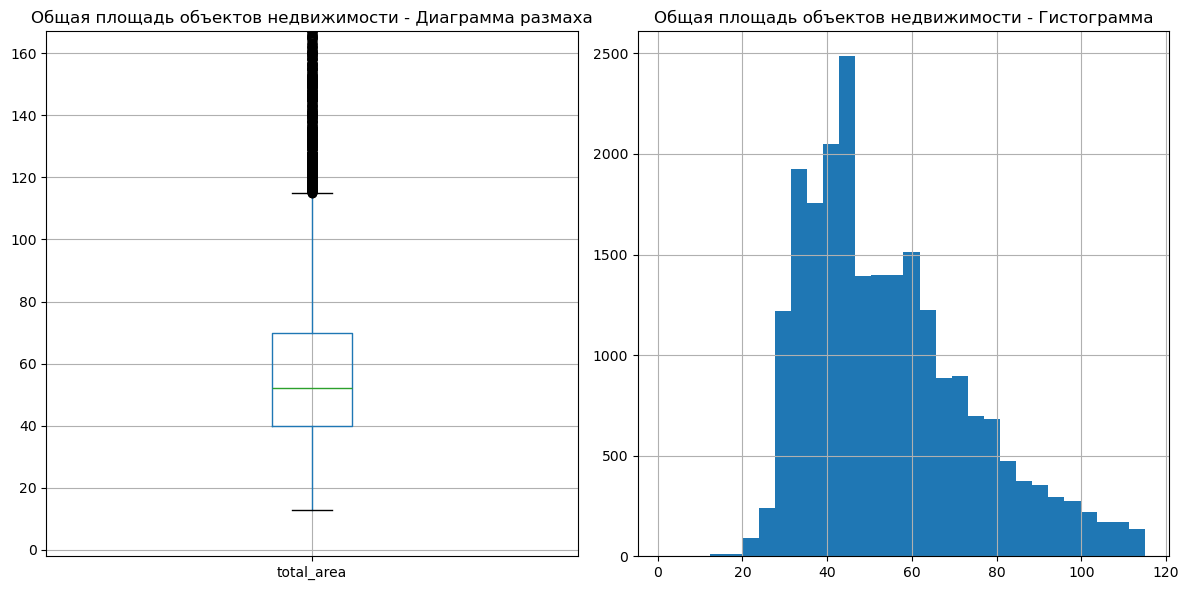

count   23560.00
mean       60.42
std        35.57
min        13.00
25%        40.00
50%        52.00
75%        70.00
max       900.00
Name: total_area, dtype: float64

In [85]:
hist_func('total_area', 'Общая площадь объектов недвижимости')

Из гистограммы вилно, что диапозон значений без выбросов - 18м² до 116м². Большинство недвижимости имеет площадь 45м². Меньше всего значений - объекты площадью менее 25м² и более 90м².

**Жилая площадь**

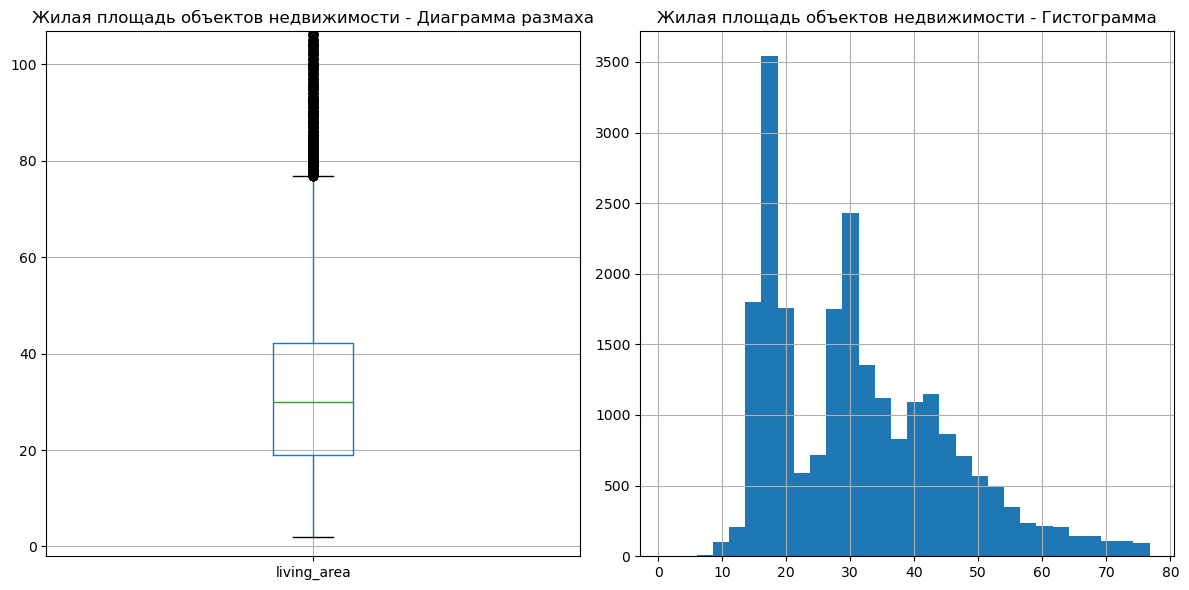

count   23560.00
mean       34.54
std        22.27
min         2.00
25%        19.00
50%        30.00
75%        42.10
max       409.70
Name: living_area, dtype: float64

In [88]:
hist_func('living_area', 'Жилая площадь объектов недвижимости')

Исходя из гистограммы можно сделать вывод, что нормальные значения находятся в диапазоне от 10м² до 76м². Гистограмма имеет два пика значений - 17м² и 30м². Меньше всего значений встречается до 14м² и после 60 м². 

**Площадь кухни**

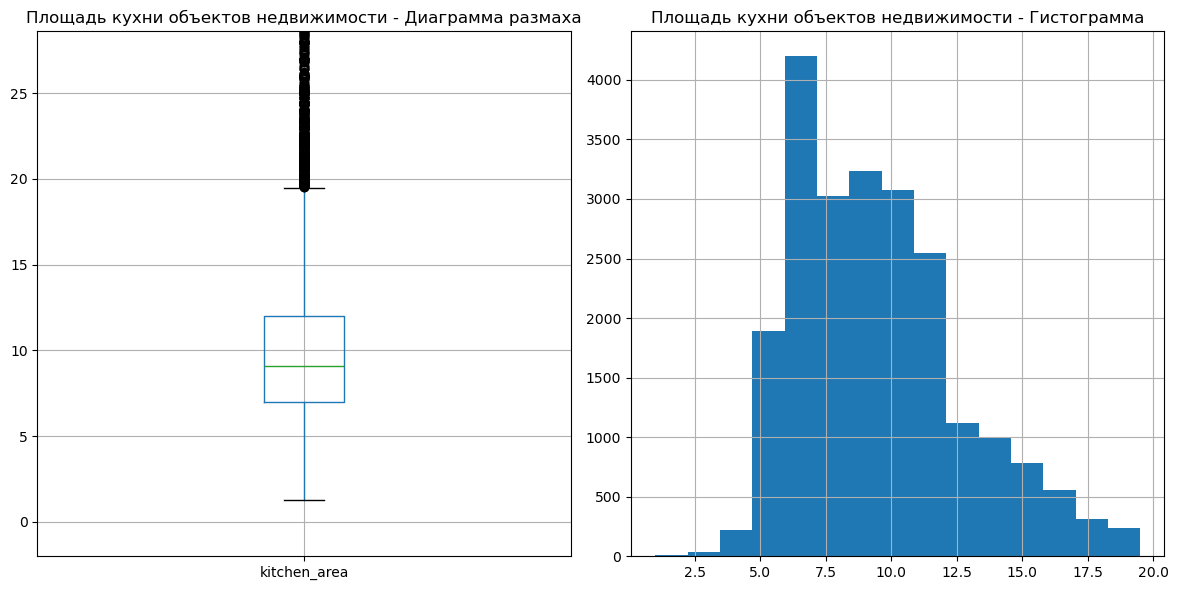

count   23560.00
mean       10.57
std         6.07
min         1.30
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

In [91]:
hist_func('kitchen_area', 'Площадь кухни объектов недвижимости', 15)

Из гистограммы видно, что нормальный диапазон значений лежит от 2.5 м² до 19 м². Больше всего значений 6м². Кухни, площадью до 4.8 м² встречаются редко.

**Цена объекта**

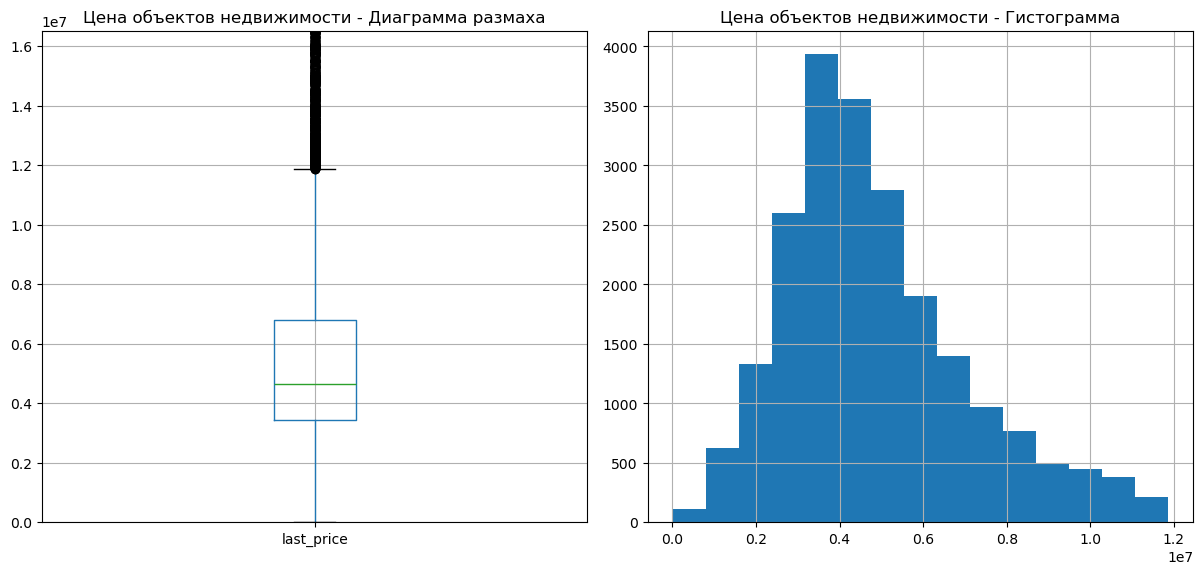

count       23560.00
mean      6532933.03
std      10833030.96
min         12190.00
25%       3420000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

In [94]:
hist_func('last_price', 'Цена объектов недвижимости', 15)

Значения представлены в 10 млн.руб. Диапазан нормальных значений до 1.1. Чаще всего недвижимость стоит 0.35. Цена объектов до 0.1 и после 1.0 встречаются редко.

**Количество комнат**

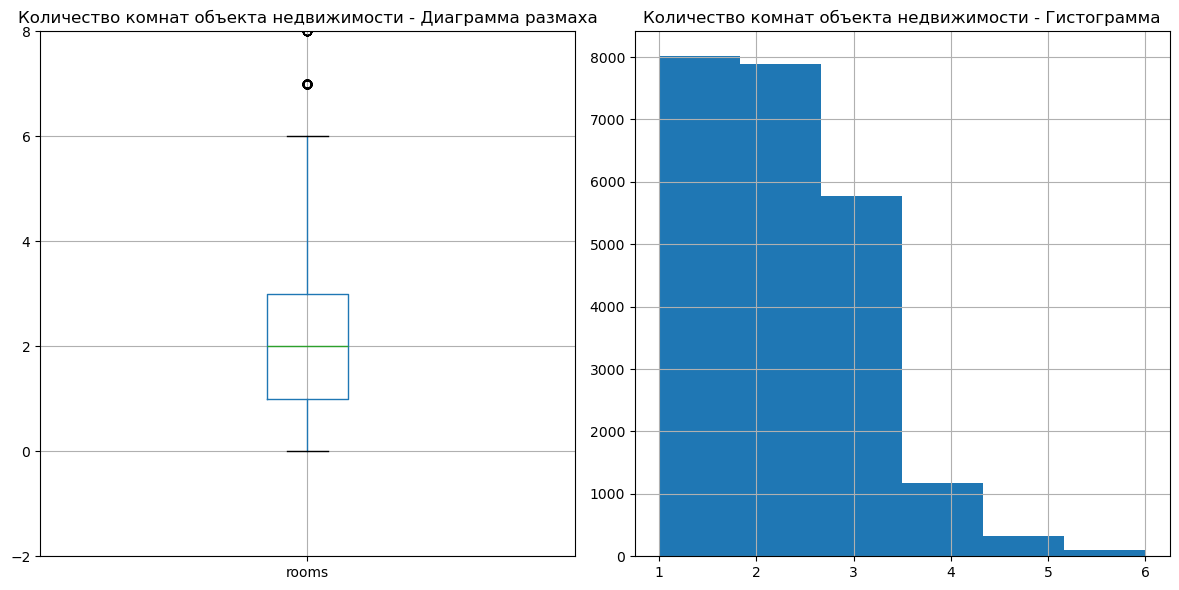

count   23560.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

In [97]:
hist_func('rooms', 'Количество комнат объекта недвижимости', 6)

Гистограмма показывает, что больше всего однокомнатных квартир и чуть меньше двухкомнатных. Самые редкие квартиры - 5 и более комнат.

**Высота потолков**

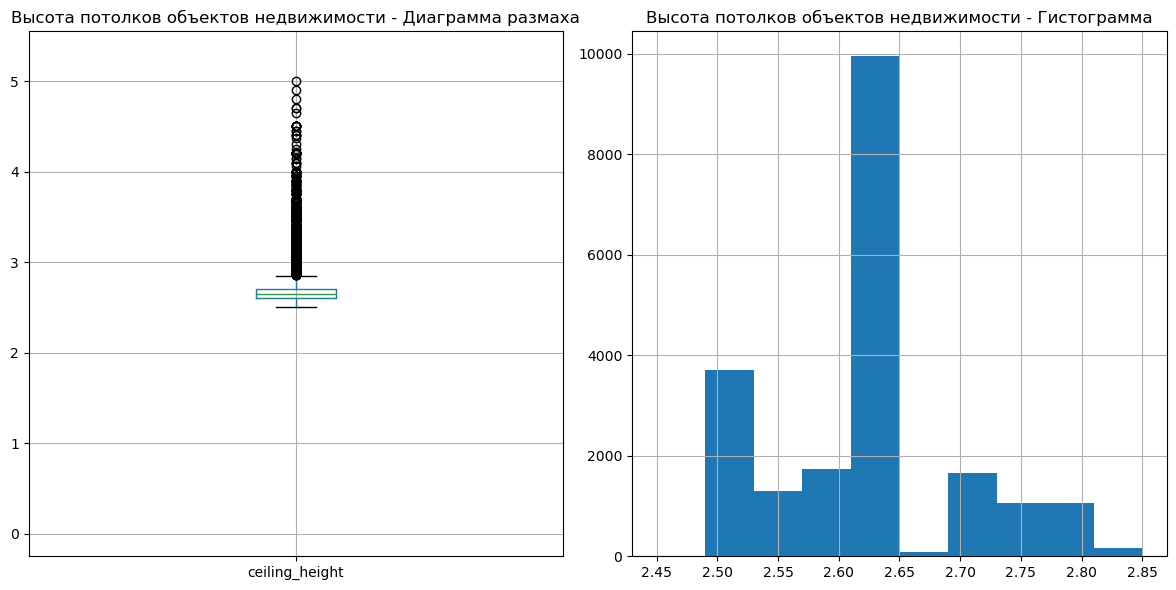

count   23560.00
mean        2.70
std         0.21
min         2.50
25%         2.60
50%         2.65
75%         2.70
max         5.00
Name: ceiling_height, dtype: float64

In [100]:
hist_func('ceiling_height', 'Высота потолков объектов недвижимости', 10)

Диапазон нормальных значений - 2.5м - 2.85м. Больше всего встречаются потолки высотой 2.62м -2.65м. Меньше всего недвижимостей с высотой 2.65м - 2.69м и от 2.82м. 

**Этаж объекта недвижимости**

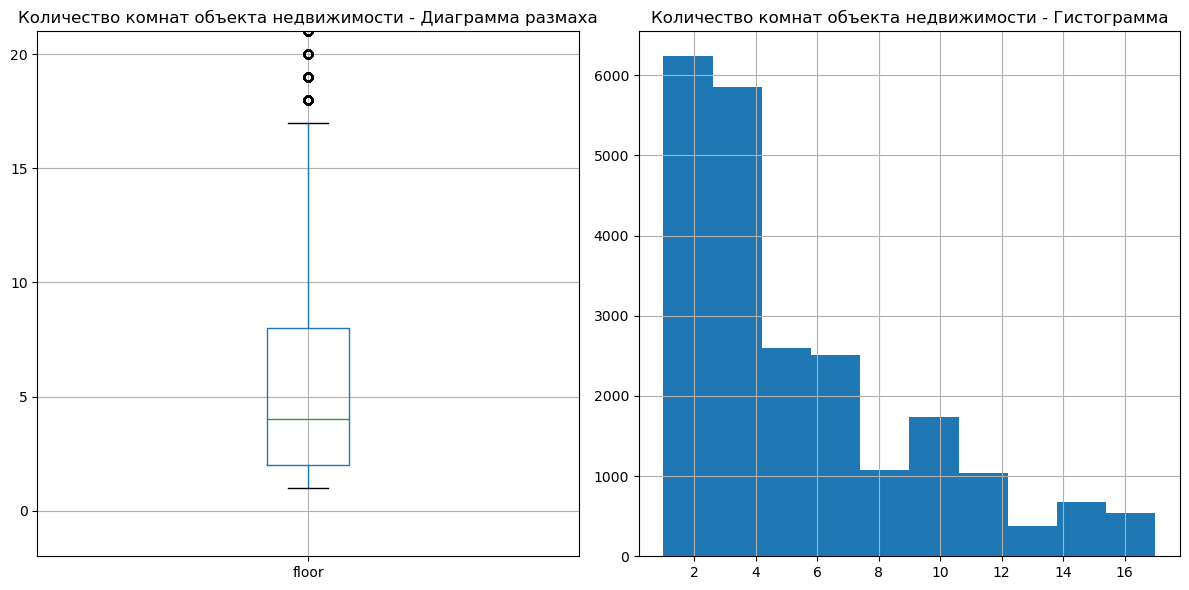

count   23560.00
mean        5.90
std         4.89
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

In [103]:
hist_func('floor', 'Количество комнат объекта недвижимости', 10)

Диапазона значений находится от 1 до 17. Больше всего объектов расположено на 1 - 2 этажах. Начиная с 13 этажа объекты начинают встречаться меньше всего.

**Тип этажа квартиры («первый», «последний», «другой»)**

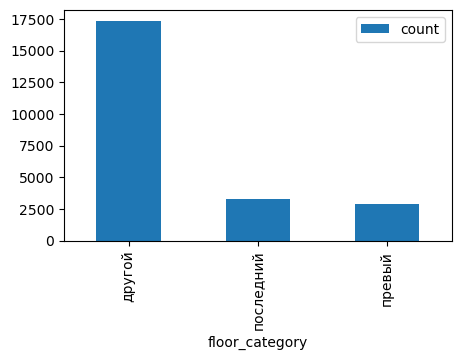

In [106]:
data['floor_category'].value_counts().plot.bar(figsize=(5, 3), legend=True)
plt.show()

Число объектов недвожимости, которые находятся первом или последнем этажах, примерно находятся на одном уровне. Объетв, которые ноходятся на других этажах, намного больше.

**Общее количество этажей в доме**

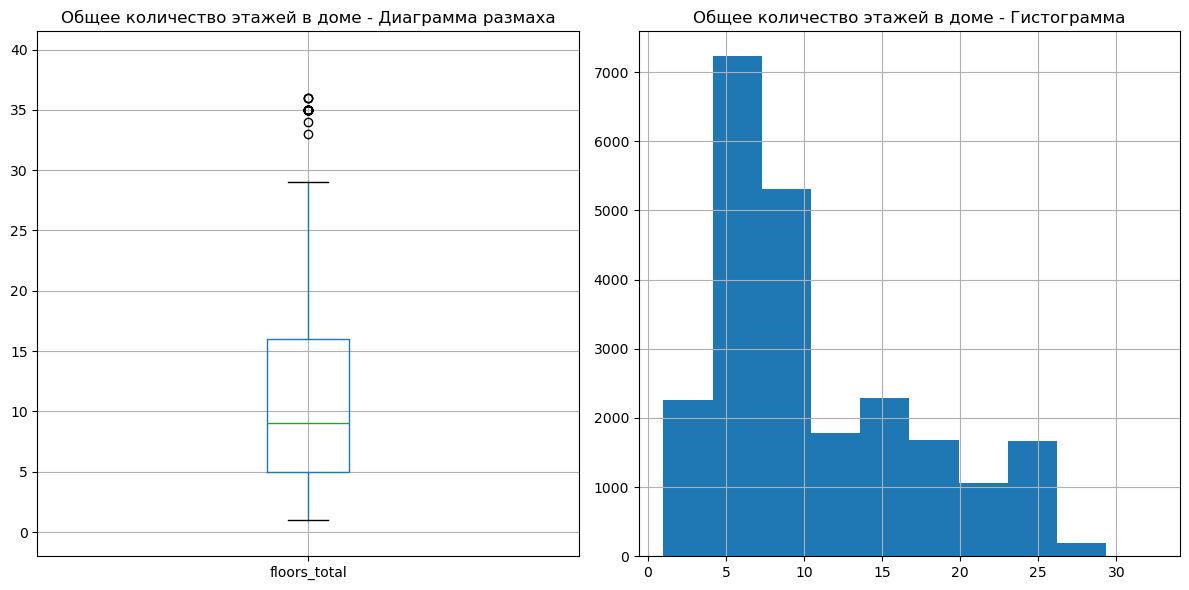

count   23475.00
mean       10.69
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

In [109]:
hist_func('floors_total', 'Общее количество этажей в доме', 10)

Диапазон общего количества этажей в доме находится в пределах от 1 до 28. Больше всего объектов высотой 5 этажей. После 25-го этажа объекты встречаются редко.

**Расстояние до центра города в метрах**

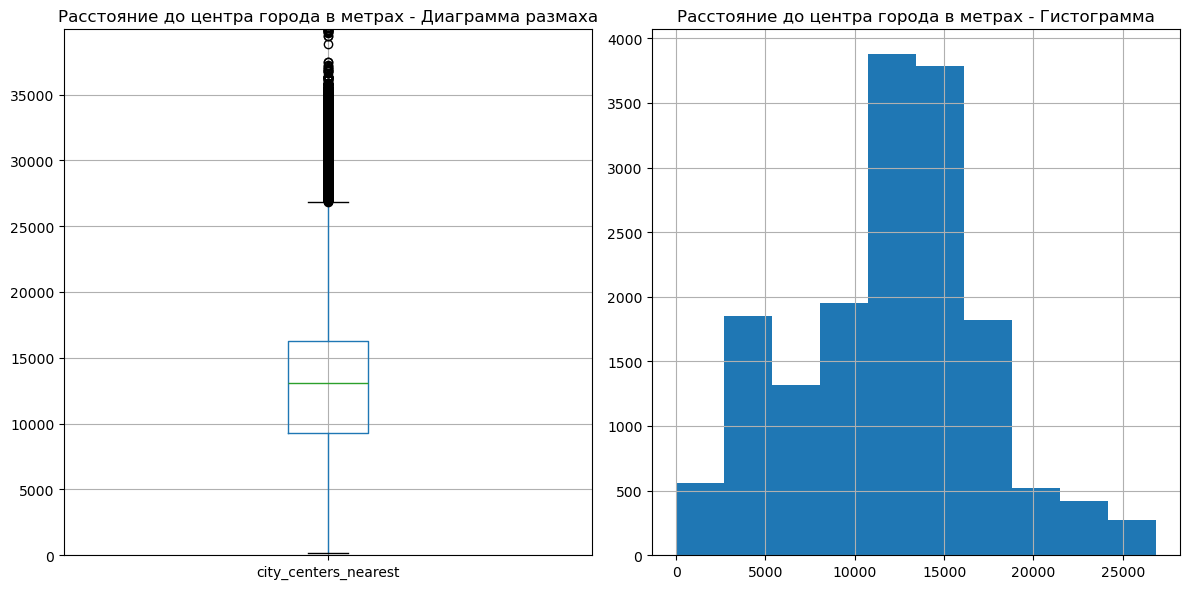

count   18081.00
mean    14198.48
std      8607.27
min       181.00
25%      9249.00
50%     13107.00
75%     16293.00
max     65968.00
Name: city_centers_nearest, dtype: float64

In [112]:
hist_func('city_centers_nearest', 'Расстояние до центра города в метрах', 10)

Диапазон значений находится в пределах до 22000м. Больше всего объектов находится на расстоянии от 11000м до 12800м. После 18000м объекты встречаются редко.

**Расстояние до ближайшего парка**

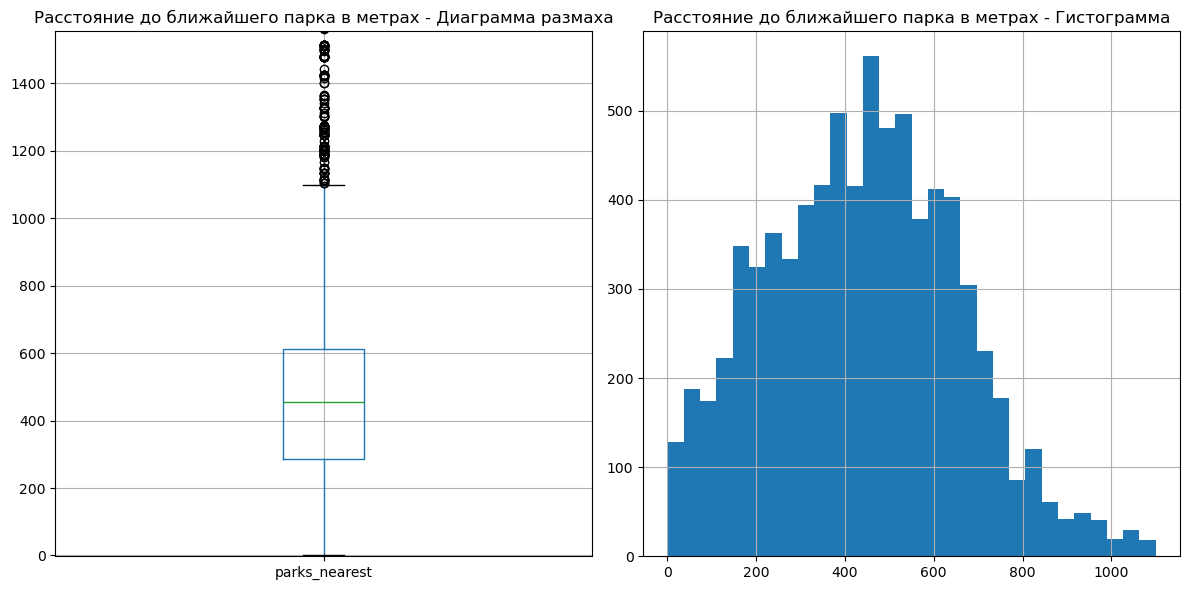

count   8027.00
mean     490.94
std      343.12
min        1.00
25%      287.00
50%      454.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

In [115]:
hist_func('parks_nearest', 'Расстояние до ближайшего парка в метрах')

Диапазон значений находится в пределах от 1 м до 1250м. Больше всего объектов находится на расстоянии 450м. После 830м значения объекты встречаются редко.

#### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

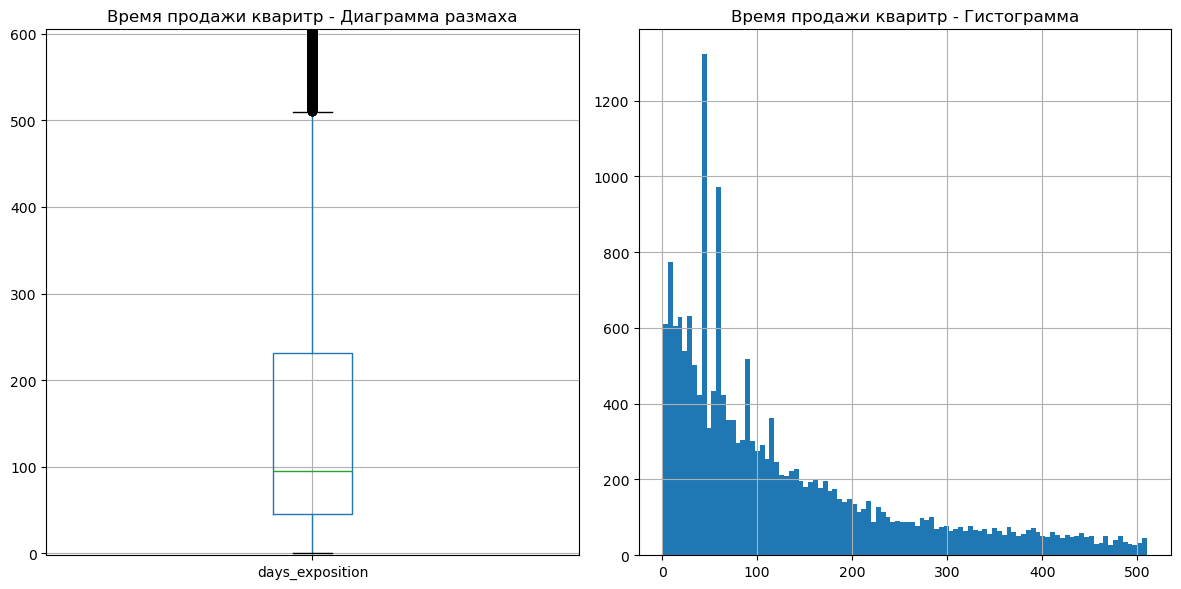

count   20393.00
mean      180.82
std       219.94
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

In [118]:
hist_func('days_exposition', 'Время продажи кваритр', 100)

На гистограмме виден пик около 50-го дня. Квартиры чаще всего продаются до 100 дней.

Рассмотрим промежуток от 0 до 100 дней, чтобы увидеть более точные результаты

Text(0.5, 1.0, 'Время продажи объекта квартиры')

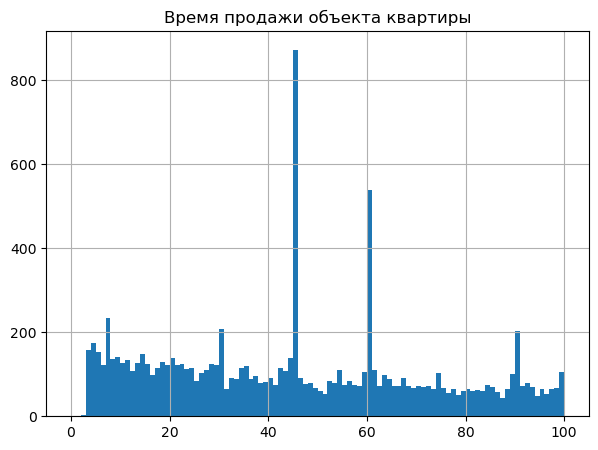

In [121]:
data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(7, 5))
plt.title('Время продажи объекта квартиры')

Здесь уже наблюдаются два пика - 45 дней и 60 дней. В целом, наблюдается тенденция снижения числа продаж при увеличении дней, не считая нескольких пиков значений.  

In [123]:
# Получим описательную статистику столбца days_exposition
data['days_exposition'].describe()

count   20393.00
mean      180.82
std       219.94
min         1.00
25%        45.00
50%        95.00
75%       231.00
max      1580.00
Name: days_exposition, dtype: float64

Среднее время продажи объекта недвижимости 181 день, медианное - 95 дней. Максимальное значение - 1580 дней. Больших значений достаточно много. Среднее значение в 2 раза больше медианного. Стандартное отклонение превышает среднее значение - это говорит о большом кол-ве выбросов. Эти выбросы могли возникнуть из-за того, пользователь мог продать квартиру, но не закрыть или удалить объявление, а оставить его. Также встречается много маленьких занчений (1-5 дней). Пользователи могли создать объевления, но из-за ошибок в заполнении данных могли их удалить.

(-100.0, 600.0)

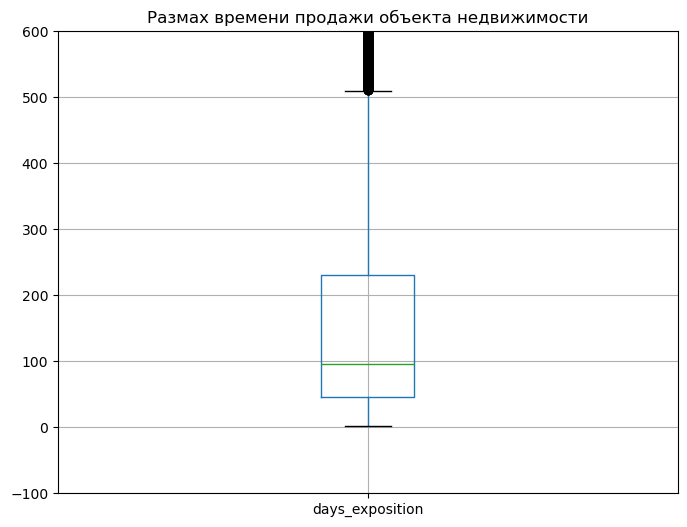

In [125]:
# Строим диаграмму размаха времени продажи объекта недвижимости
data.boxplot(column='days_exposition', figsize=(8, 6))
plt.title('Размах времени продажи объекта недвижимости')
plt.ylim(-100, 600)

Из данных диаграммы времени продажи видно: быстрая продажа - до 45 дней, нормальная продажа - от 45 до 231 дней, долгая продажа - от 231 до 510 дней. Продажи после 510 дней - выбросы.

#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.

In [128]:
# Создадим 2 переменных для лучшей наглядности, в которую поместим названия необходимых столбцов
data_factor_corr = data[['last_price', 'total_area', 'kitchen_area','living_area', 'rooms']]
data_date_corr = data[['exposition_weekday', 'exposition_month', 'exposition_year', 'last_price']]

              last_price  total_area  kitchen_area  living_area  rooms
last_price          1.00        0.65          0.51         0.58   0.36
total_area          0.65        1.00          0.66         0.95   0.76
kitchen_area        0.51        0.66          1.00         0.50   0.33
living_area         0.58        0.95          0.50         1.00   0.83
rooms               0.36        0.76          0.33         0.83   1.00


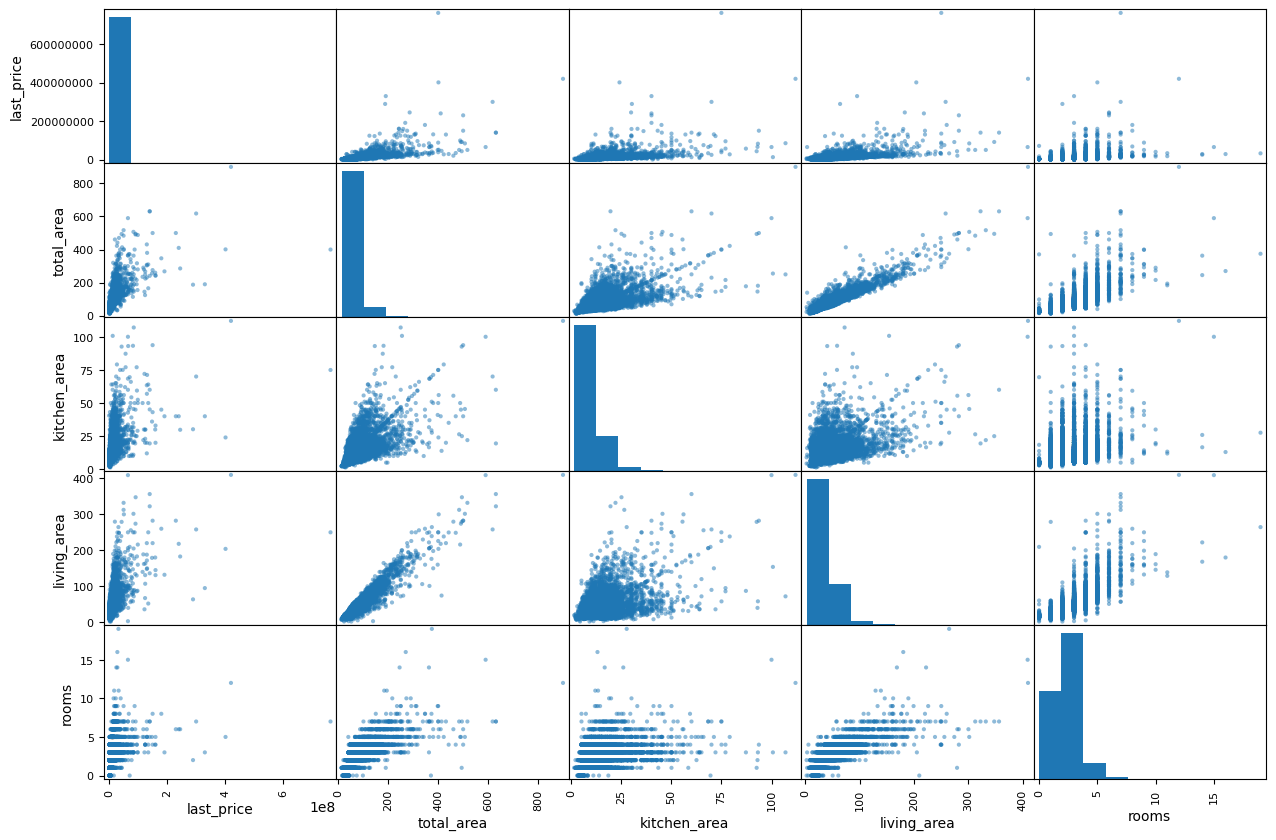

In [129]:
# Распечатаем матрицу корреляции для data_factor_corr. 
print(data_factor_corr.corr())
#Построим диаграмму рассеяния попарно для всех величин 
pd.plotting.scatter_matrix(data_factor_corr, figsize=(15, 10))
plt.show()

                    exposition_weekday  exposition_month  exposition_year  \
exposition_weekday                1.00              0.01            -0.00   
exposition_month                  0.01              1.00            -0.27   
exposition_year                  -0.00             -0.27             1.00   
last_price                        0.00              0.00            -0.04   

                    last_price  
exposition_weekday        0.00  
exposition_month          0.00  
exposition_year          -0.04  
last_price                1.00  


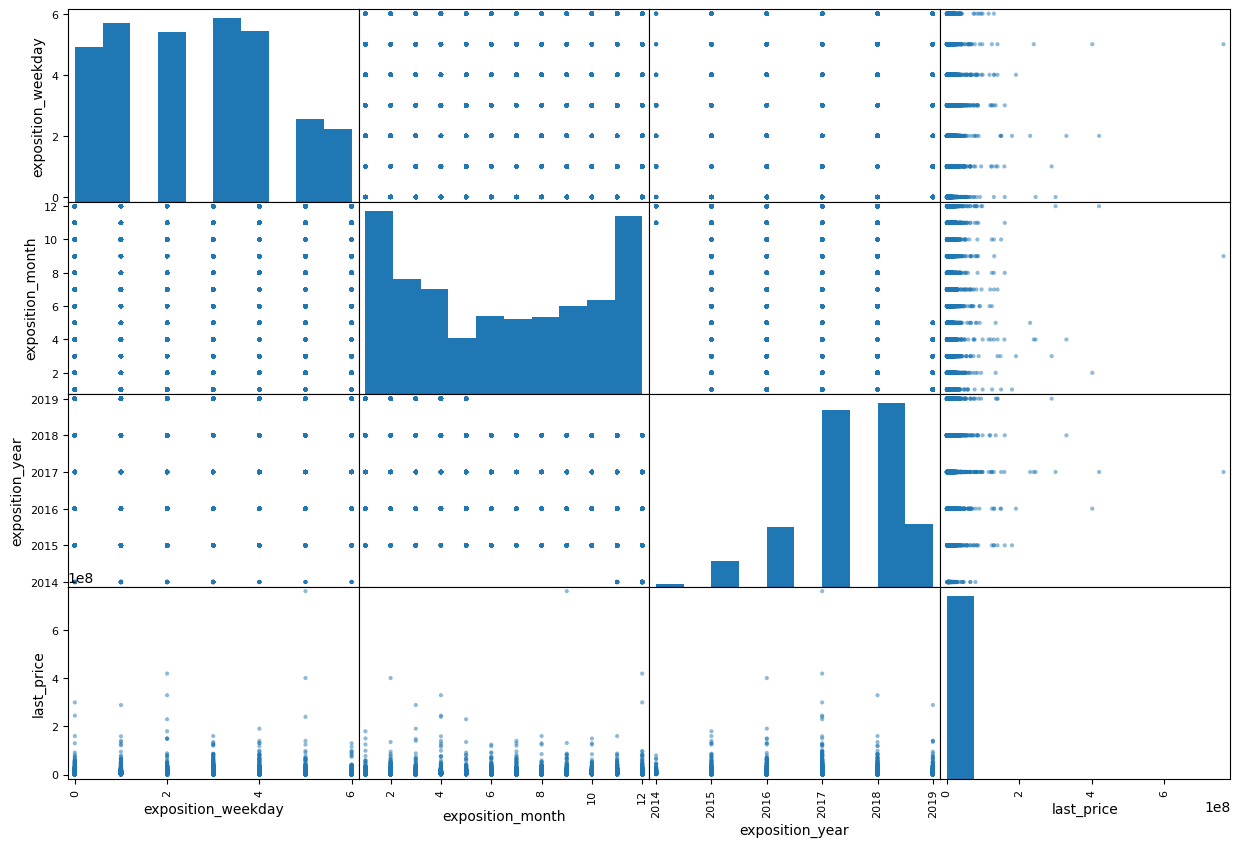

In [130]:
# Распечатаем матрицу корреляции для data_date_corr.corr. 
print(data_date_corr.corr())
#Построим диаграмму рассеяния попарно для всех величин 
pd.plotting.scatter_matrix(data_date_corr, figsize=(15, 10))
plt.show()

Из данных построенных гистограмм видно, что наибольшее влияние на цену оказывает общая площадь(0.65), число комнат(0.36), жилая площадь(0.54) и площадь кухни (0.44). Даты размещения (день недели, месяц, год) и этаж не оказывают влияния на цену объекта.

In [132]:
# Сделаем функцию для автоматического выода графиков зависимости цены от различных факторов для категориальных параметров.
def plot_func(column_name, title_name):
    """
    Данная функция выводит графики зависимости цены от различных факторов
    """
    try:
        return data.plot(x=column_name, y='last_price', style='o', figsize=(8, 6), alpha = 0.03), plt.title(title_name) 
        plt.show()
    except:
        return 'неверное название столбца'

In [133]:
# Сделаем функцию для автоматического выода графиков зависимости цены от различных факторов.
def plot_func1(column_name, title_name):
    """
    Данная функция выводит графики зависимости цены от различных факторов
    """
    try:
        return data.pivot_table(index=column_name, values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5), kind='bar')
        plt.show()
    except:
        return 'неверное название столбца'

(<Axes: title={'center': 'Зависимость общей площади от стоимости квартиры'}, xlabel='living_area'>,
 Text(0.5, 1.0, 'Зависимость общей площади от стоимости квартиры'))

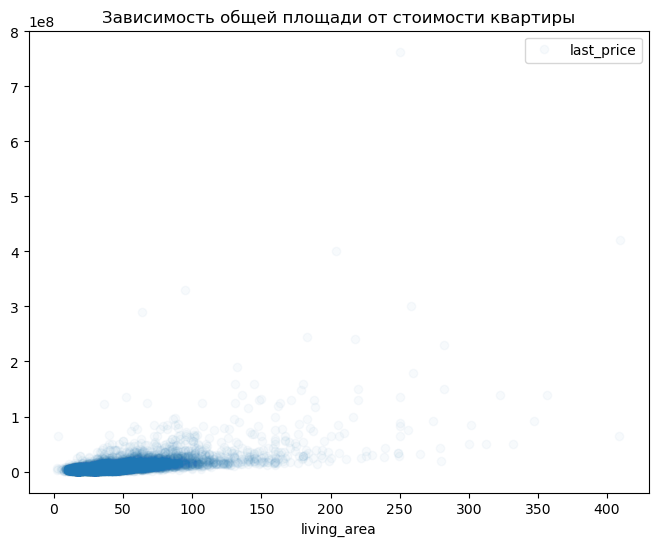

In [134]:
plot_func('living_area', 'Зависимость общей площади от стоимости квартиры')

Из графика следует, что больше всего данных для квартир стоимостью до 20 млн. руб. и жилой площадью до 100 м². Зависимость прямопропорциональная - чем больше жилая площадь квартиры, тем выше ее стоимость.

(<Axes: title={'center': 'Зависимость жилой площади от стоимости квартиры'}, xlabel='total_area'>,
 Text(0.5, 1.0, 'Зависимость жилой площади от стоимости квартиры'))

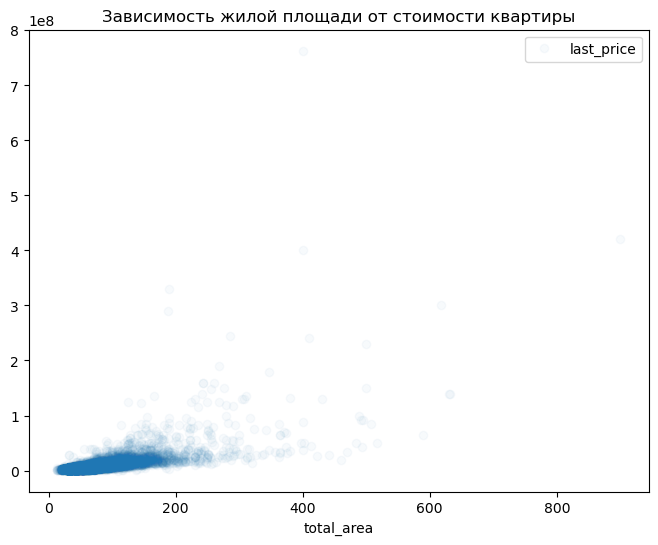

In [136]:
plot_func('total_area', 'Зависимость жилой площади от стоимости квартиры')

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью до 175 кв.м. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена.

<Axes: xlabel='rooms'>

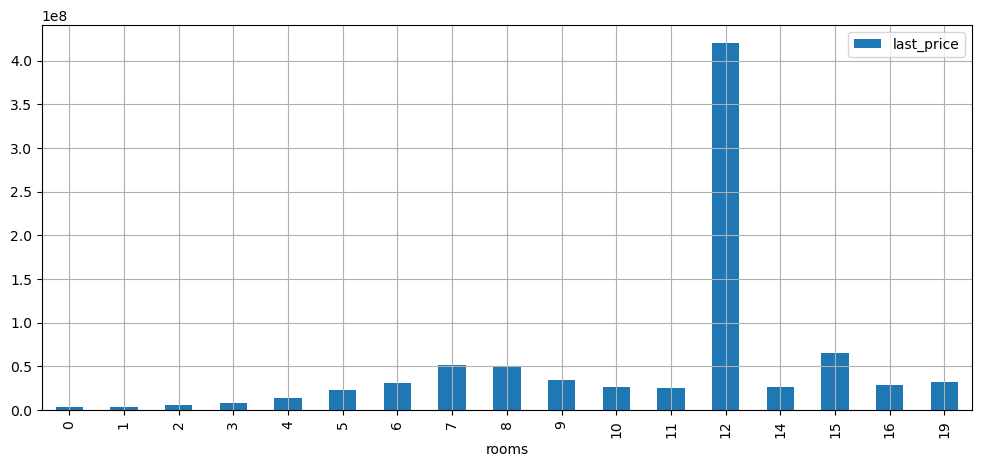

In [138]:
plot_func1('rooms', 'Зависимость общей площади от стоимости квартиры')

Из графика видно, что цена повышается по мере увеличения числа комнат до 7, а затем немного падает. Объекты недвижимости, у которых 12 комнат, имеют аномально высокое значение цены. Проверим его.

In [140]:
 data.query('rooms == 12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,pounds_around_3000,ponds_nearest,days_exposition,square_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
19540,8,420000000.00,900.00,2017-12-06,12,2.80,25.00,409.70,25,False,...,NaN,2.00,318.00,106.00,466666.67,2,12,2017,последний,8.00


Оно аномальное, так как такое значение одно.

(<Axes: title={'center': 'Зависимость площади кухни от стоимости квартиры'}, xlabel='kitchen_area'>,
 Text(0.5, 1.0, 'Зависимость площади кухни от стоимости квартиры'))

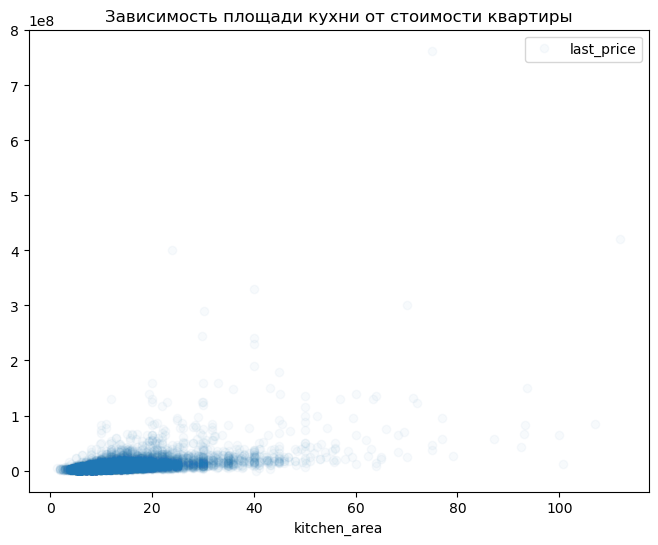

In [142]:
plot_func('kitchen_area', 'Зависимость площади кухни от стоимости квартиры')

Из графика видно, что больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни до 25 м². Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость.

<Axes: xlabel='exposition_year'>

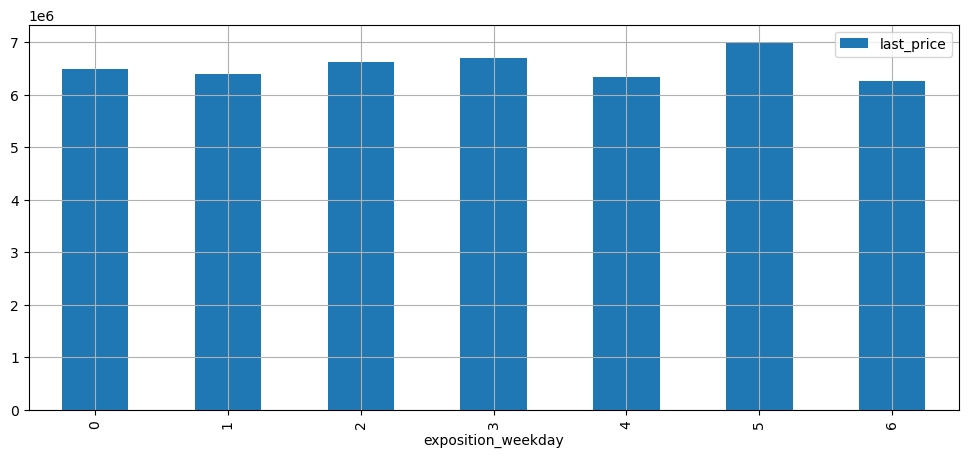

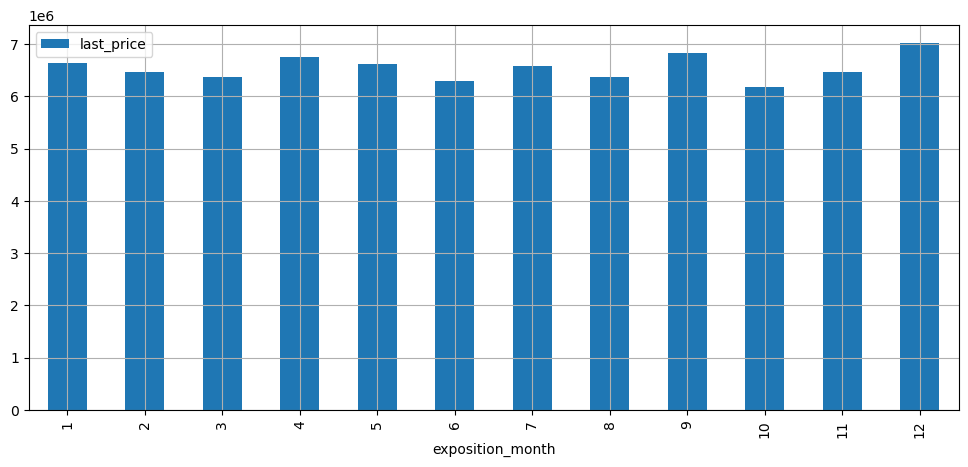

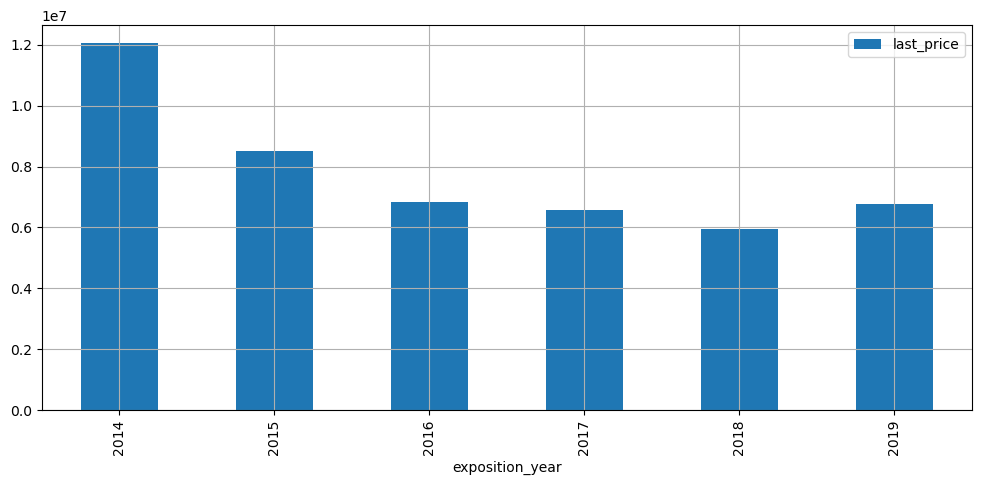

In [144]:
plot_func1('exposition_weekday', 'Зависимость дня публикации от стоимости квартиры')
plot_func1('exposition_month', 'Зависимость месяца публикации от стоимости квартиры')
plot_func1('exposition_year', 'Зависимость года публикации от стоимости квартиры')

Зависимоть между датой размещения объявления (день недели, месяц, год) и стоимостью квартир практически отсутствует. При этом есть небольшое снижение с 2014 по 2015 год. Посчитаем число объявлений по каждому году, чтобы проверить их.

In [146]:
data.value_counts('exposition_year')

exposition_year
2018    8474
2017    8155
2019    2871
2016    2755
2015    1169
2014     136
Name: count, dtype: int64

Значений в 2014 и 2015 годах меньше чем в следующих. Из-за этого они больше подвержены искажению, так как могут иметь аномально высокие значения.

Чтобы посмотреть связь между этажом и стоимостью квартиры построим сводную таблицу и визуализируем результаты на графике.

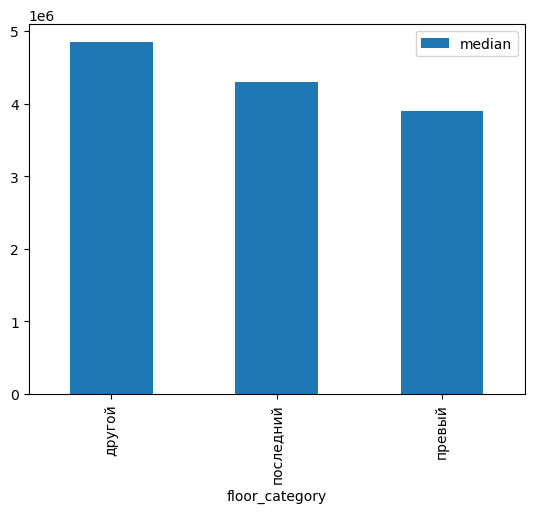

In [149]:
# Создаем сводную таблицу
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
# Присваиваем названия колонкам
pivot_table_floor_category.columns = ['mean', 'count', 'median']
#Строим зависимость
pivot_table_floor_category.plot(y = 'median', kind='bar')
plt.show()

Из графика видно, что медианное значение для квартир на первом этаже самое маленькое. Максимальное медианное значение стоимости квартир находится в группе 'другой'.

Вывод: На общую стоимость объекта больше всего влияет общая и жилая площади квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет*

#### "Посчитаем  среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выдедим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [153]:
# Определим топ 10 населенных пунктов по числу объявлений.
data_top_10 = data['locality_name'].value_counts().head(10)

In [154]:
# Выведем среднюю цену за кв м по топ 10 населенным пунктам
data_top_10_pivot_table = data.query('locality_name in @data_top_10.index').pivot_table(index='locality_name', values='square_meter_price').sort_values(by=['square_meter_price'], ascending=False)
data_top_10_pivot_table

,square_meter_price
locality_name,
Санкт-Петербург,114588.20
Пушкин,103147.83
Кудрово,95124.29
поселок Парголово,90083.46
поселок Мурино,85052.22
поселок Шушары,78623.76
Колпино,75393.34
Гатчина,68478.60
Всеволожск,68429.36


Наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге (114588.20 руб.). Следом по стоимости идет Пушкин (103147.83руб.). Наименьшая цена за квадратный метр в Выборге (58174.83 руб.).

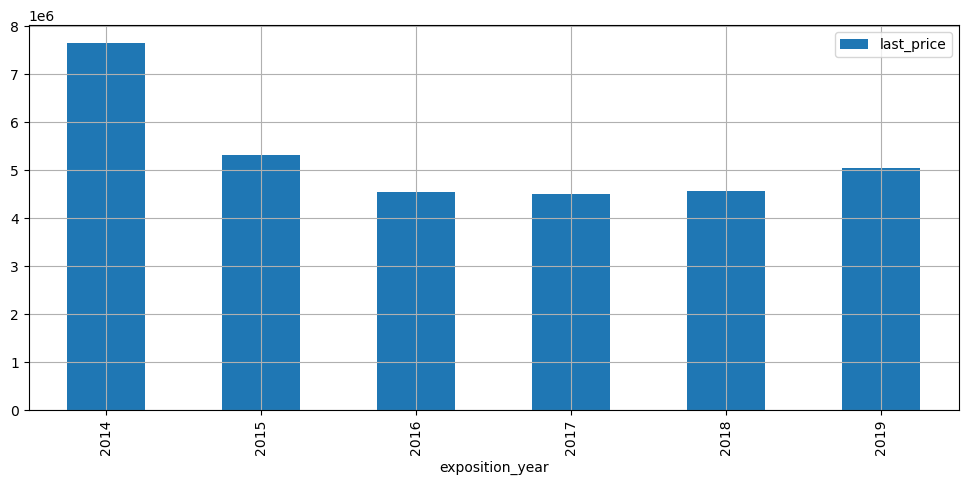

In [156]:
data.pivot_table(index='exposition_year', values='last_price', aggfunc='median').plot(grid=True, figsize=(12, 5), kind='bar')
plt.show()

#### Выделим квартиры в Санкт-Петербурге  и вычислим среднюю цену каждого километра.

In [158]:
data_spb = data.query('locality_name == "Санкт-Петербург"')

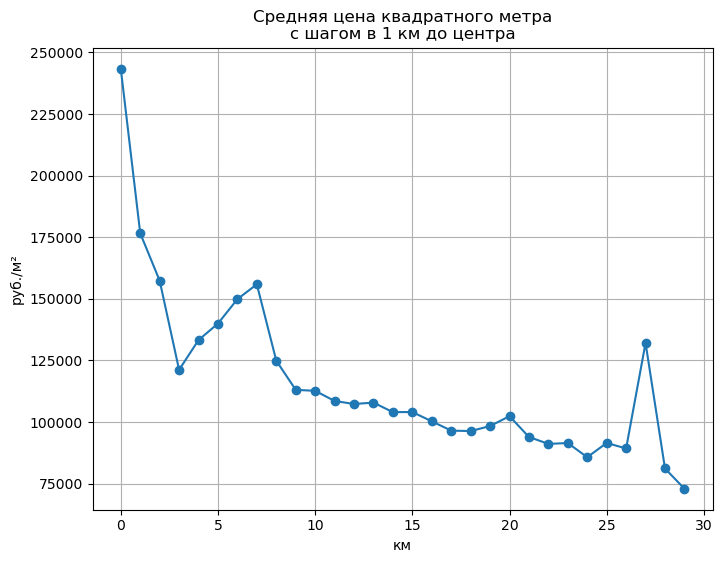

In [159]:
# Рассчитаем среднюю цену квадратного метра до центра
(
data_spb
    .pivot_table(index='city_centers_nearest_km', values='square_meter_price')
    .plot(marker='o', grid=True, figsize=(8, 6), legend=False)
)
plt.title('Средняя цена квадратного метра\nс шагом в 1 км до центра')
plt.xlabel('км')
plt.ylabel('руб./м²')
plt.show()

Из графика видно, что максимальная цена квадратного метра находится в первом километре. Затем цена значетельно падает. Есть пик на 7 км, а дальше цена постепенно убывает и имеет еще один пик в 27 км.

###  Общий вывод

**В ходе исследования были установлены значения параметров**, которые являются наиболее типичными для объекта недвижимости:
 - общая площадь равна 45м²;
 - жилая площадь находится в диапазоне от 17м² и 30м²;
 - площадь кухни - 4.8 м²;
 - чаще всего недвижимость стоит 3.5 илн.руб;
 - число комнат - 1-2;
 - больше всего встречаются потолки высотой 2.62м -2.65м;
 - наибольшее число объектов расположено на 1 - 2 этажах;
 - больше всего объектов высотой 5 этажей;
 - больше всего объектов находится на расстоянии от 11000м до 12800м до центра города;
 - больше всего объектов находится на расстоянии 450м от ближайшего парка.

**Также установили время продаж квартир:**
- быстрая продажа - до 45 дней, 
- нормальная продажа - от 45 до 231 дней,
- долгая продажа - от 231 до 510 дней.

**Были установлены факторы, оказывающие наибольшее влияни на формирование цены**. На общую стоимость объекта больше всего влияет общая(0.65), жилая(0.54) площади и кухни (0.44) квартиры. Зависимость прямопропорциональная - чем больше площадь квартиры, тем выше цена. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Цена повышается по мере увеличения числа комнат. Дата публикации объявления на стоимость не влияет.

**Рассчитана средняя стоимость квадратного метра и выделены 10 населенных пунктов с их наибольней стоимостью.** Наивысшая средняя цена за 1 квадратный метр в Санкт-Петербурге (113,614.90 руб.). Следом по стоимости идет Пушкин (102,874.39 руб.). Наименьшая цена за квадратный метр в Выборге (56,954.16 руб.). 

**Вычислина средняя стоимость квадратного метра в Санкт-Петербурге по мере цдаления от центра на 1 км.** Максимальная цена квадратного метра находится в первом километре. Затем цена значетельно падает. Есть пик на 7 км, а дальше цена постепенно убывает и имеет еще один пик в 27 км.

**Коллегам следует обратить внимание** при построении автоматезированной системы для определения рыночной стоимости объекта недвижимости на общую, жилую площади и кухни квартиры, так как именно эти показатели оказывают наибольшее влияние на формирование цены. Чем больше площадь квартиры (общая, жилая, кухни), тем выше цена. Также в Санкт-Петербурге стоимость квадратного метра зависит от расстояния от центра. Самый дорогой находится в первом килломтре (245000 руб.), а затем постепенно уменьшается, имея пик на 7 км (160000 руб.) и 27 км. (130000 руб.)  